# Hierarchical series with different levels of granularity

## Hierarchical Time Series Forecasting & Reconciliation
*It has the following steps:*
- Building Hierarchical Time Series
- Hierarchical Forecasting
- Forecast reconciliation
## Time Series at top levels have noticeable trends and seasonality. We built time series models on each time series using ARIMA.
- we took seasonality and trends into consideration when modeling
- we used automatic selection of parameters for ARIMA model
## We tried 3 such simplified reconciliaton strategies: 
- BU, 
- OLS, 
- Mint


In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px


file_path = '/home/olga/ts_year_project/TimeSeriesMasters2023/eda_olga/energy_hourly_dataset_2012.csv'
df = pd.read_csv(file_path)
# df

In [316]:
#df.set_index('date', inplace=True)

In [317]:
is_unique = df['date'].duplicated().any()
is_unique

False

In [318]:
df.reset_index(inplace=True)

In [319]:
# fig = px.line(df, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по часам')
# fig.show()

In [320]:
# df.index = pd.to_datetime(df.index)

In [321]:
# df.reset_index(inplace=True)

In [322]:
# df.info()

In [323]:
def transform_to_custom_freq(df, freq):
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    # df.set_index('date', inplace=True)
    df_resampled = df.resample(freq).sum()
    # df_resampled.reset_index(inplace=True)
    
    return df_resampled

## week

In [324]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [325]:
# df

In [326]:
selected_freq = 'W'
df_resampled_week = transform_to_custom_freq(df, selected_freq)
# df_resampled_week

## Daily

In [327]:
# df

In [328]:
df.reset_index(inplace=True)

In [329]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# df

In [330]:
selected_freq = 'D'
df_resampled_day = transform_to_custom_freq(df, selected_freq)
# df_resampled_day

## по месяцам

In [331]:
df.reset_index(inplace=True)

In [332]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [333]:
# df.reset_index(inplace=True)
selected_freq = 'M'
df_resampled_month = transform_to_custom_freq(df, selected_freq)
# df_resampled_month

In [334]:
df_resampled_month.reset_index(inplace=True)

In [335]:
# df_resampled_month

In [336]:
# fig = px.line(df_resampled_month, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по месяцам')
# fig.show()

In [337]:
# df

## Обучение моделей на каждой гранулярности

In [338]:
from statsmodels.tsa.arima.model import ARIMA
# from fbprophet import Prophet

In [339]:
# !pip install statsmodels
#!python -m pip install prophet

In [340]:
# !python -m pip install fbprophet

In [341]:
from pmdarima import auto_arima

In [342]:
# !pip install pmdarima

## hour

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [344]:
train_size = int(len(df) * 0.8)
train_hour, test_hour = df.iloc[:train_size], df.iloc[train_size:]

In [345]:
auto_arima_model = auto_arima(train_hour['value'], seasonal=True, stepwise=True, suppress_warnings=True)

In [346]:
auto_arima_model.order

(3, 0, 2)

In [347]:
auto_arima_model.seasonal_order

(0, 0, 0, 0)

In [348]:
print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

ARIMA Order: (3, 0, 2)
ARIMA Seasonal Order: (0, 0, 0, 0)


In [349]:
fitted_model = auto_arima_model.fit(train_hour['value'])

In [350]:
forecast_hour = fitted_model.predict(n_periods=len(test_hour))

In [351]:
# forecast_hour

In [352]:
mae = mean_absolute_error(test_hour['value'], forecast_hour)
mse = mean_squared_error(test_hour['value'], forecast_hour)

In [353]:
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

Test Mean Absolute Error: 18.296752543658766
Test Mean Squared Error: 587.6226961867825


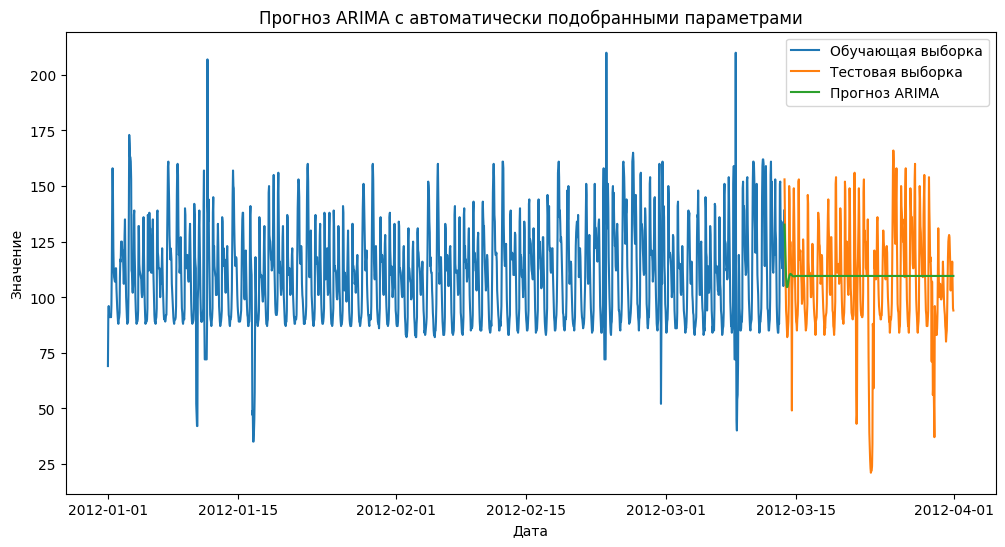

In [354]:
plt.figure(figsize=(12, 6))
plt.plot(train_hour.index, train_hour['value'], label='Обучающая выборка')
plt.plot(test_hour.index, test_hour['value'], label='Тестовая выборка')
plt.plot(test_hour.index, forecast_hour, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
# plt.show()

## week

In [355]:
train_size = int(len(df_resampled_week) * 0.8)
train_week, test_week = df_resampled_week.iloc[:train_size], df_resampled_week.iloc[train_size:]

auto_arima_model = auto_arima(train_week['value'], seasonal=True, stepwise=True, suppress_warnings=True)
print(auto_arima_model.order)
print(auto_arima_model.seasonal_order)

print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

fitted_model = auto_arima_model.fit(train_week['value'])

forecast_week = fitted_model.predict(n_periods=len(test_week))

mae = mean_absolute_error(test_week['value'], forecast_week)
mse = mean_squared_error(test_week['value'], forecast_week)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

(0, 0, 0)
(0, 0, 0, 0)
ARIMA Order: (0, 0, 0)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 1260.5757575757586
Test Mean Squared Error: 1685585.7107438035


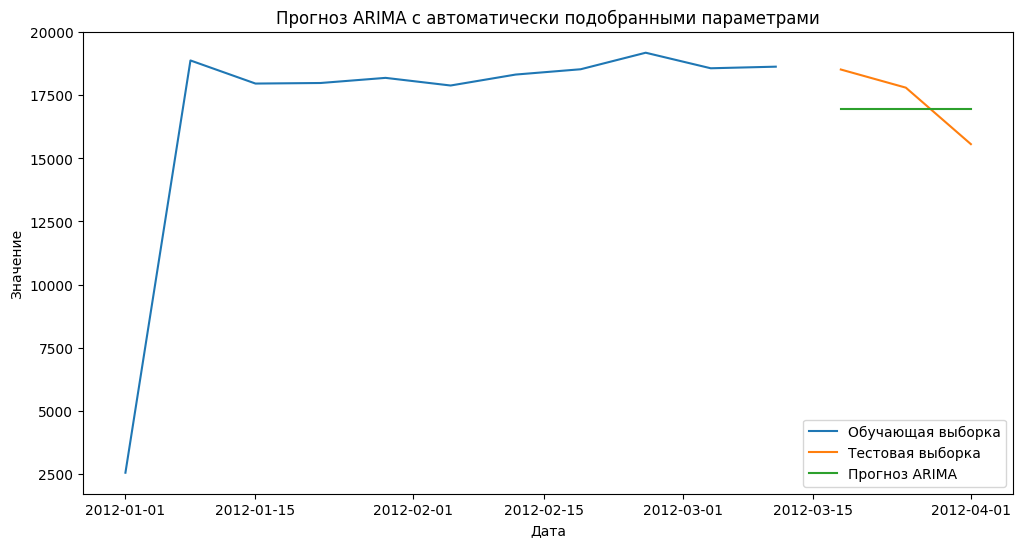

In [356]:
plt.figure(figsize=(12, 6))
plt.plot(train_week.index, train_week['value'], label='Обучающая выборка')
plt.plot(test_week.index, test_week['value'], label='Тестовая выборка')
plt.plot(test_week.index, forecast_week, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
# plt.show()

In [357]:
# forecast_week

## day

In [358]:
train_size = int(len(df_resampled_day) * 0.8)
train_day, test_day = df_resampled_day.iloc[:train_size], df_resampled_day.iloc[train_size:]

auto_arima_model = auto_arima(train_day['value'], seasonal=True, stepwise=True, suppress_warnings=True)
print(auto_arima_model.order)
print(auto_arima_model.seasonal_order)

print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

fitted_model = auto_arima_model.fit(train_day['value'])

forecast_day = fitted_model.predict(n_periods=len(test_day))

mae = mean_absolute_error(test_day['value'], forecast_day)
mse = mean_squared_error(test_day['value'], forecast_day)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')


(0, 0, 1)
(0, 0, 0, 0)
ARIMA Order: (0, 0, 1)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 142.67056539605065
Test Mean Squared Error: 41674.07603437521


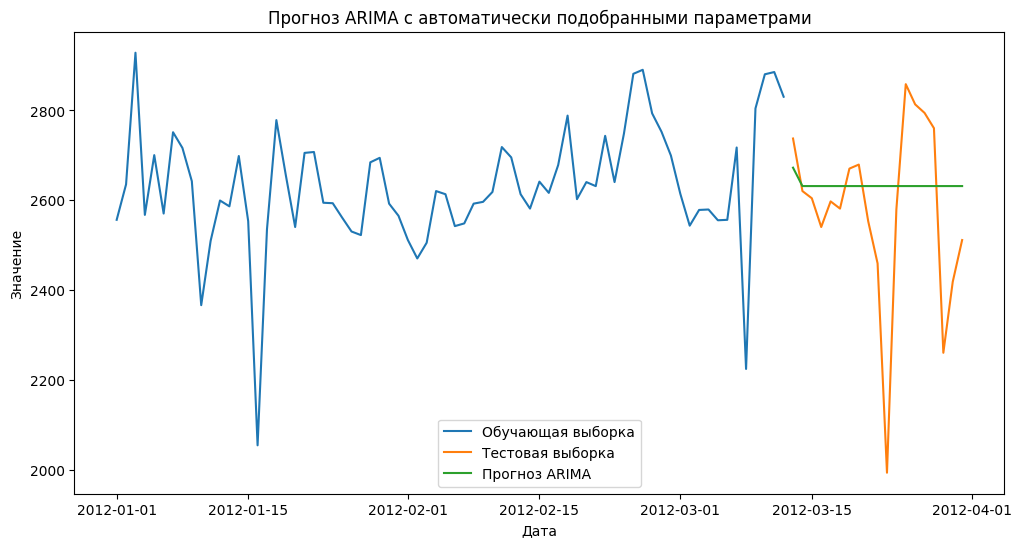

In [359]:
plt.figure(figsize=(12, 6))
plt.plot(train_day.index, train_day['value'], label='Обучающая выборка')
plt.plot(test_day.index, test_day['value'], label='Тестовая выборка')
plt.plot(test_day.index, forecast_day, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
# plt.show()

In [360]:
# forecast_day

In [361]:
# forecast_hour

In [362]:
# forecast_week

## Применяем реконсиляцию методами bu, ols, mint

In [363]:
from hierarchicalforecast.utils import aggregate
from hierarchicalforecast.methods import BottomUp, MinTrace
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation

## Bottom-Up

In [364]:
forecast_day_combined = forecast_hour.resample('D').sum() 
# forecast_day_combined

In [365]:
mae = mean_absolute_error(test_day['value'], forecast_day_combined)
mse = mean_squared_error(test_day['value'], forecast_day_combined)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

Test Mean Absolute Error: 251.09503351720358
Test Mean Squared Error: 280839.1345460175


In [366]:
# Combine lower-level forecasts to obtain higher-level forecasts using the Bottom-Up method
forecast_week_combined = forecast_day_combined.resample('W').sum()  # Aggregating hourly forecasts to weekly
# forecast_week_combined

In [367]:
mae = mean_absolute_error(test_week['value'], forecast_week_combined)
mse = mean_squared_error(test_week['value'], forecast_week_combined)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

Test Mean Absolute Error: 1870.9956615601247
Test Mean Squared Error: 7762581.31654135


## MinT method

In [368]:
# tried to take code for categoracal hierarchy from here https://gist.github.com/ngupta23/1e104f18c0440156953ac37dc8e2a616

In [369]:
from hierarchicalforecast.utils import aggregate
from hierarchicalforecast.methods import BottomUp, TopDown, MinTrace, ERM
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.evaluation import HierarchicalEvaluation

In [370]:
# # You can select a reconciler from our collection
# reconcilers = [
#       BottomUp(),
#       TopDown(method='forecast_proportions'),
#       # TopDown(method='average_proportions'),
#       # TopDown(method='proportion_averages'),
#       MinTrace(method='ols'),
#       # MinTrace(method='wls_var'),
#       # MinTrace(method='mint_shrink'),ls
#       # #ERM(method='reg_bu', lambda_reg=100) # Extremely inneficient
#       ERM(method='closed')
# ]
# hrec = HierarchicalReconciliation(reconcilers=reconcilers)

In [371]:
# Y_rec_df = hrec.reconcile(Y_hat_df=Y_hat_df, 
#                           Y_df=Y_fitted_df,
#                           S=S_df, tags=tags)
# Y_rec_df.groupby('unique_id').head(FH)

In [372]:
df_reduced = df.drop(columns=['index', 'id'])
df_reduced

,value
date,
2012-01-01 00:00:01,69.0
2012-01-01 01:00:01,92.0
2012-01-01 02:00:01,96.0
2012-01-01 03:00:01,92.0
2012-01-01 04:00:01,91.0
...,...
2012-03-31 19:00:01,110.0
2012-03-31 20:00:01,116.0
2012-03-31 21:00:01,105.0


In [373]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2012-01-01 00:00:01 to 2012-03-31 23:00:01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2184 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [374]:
df_reduced.reset_index(inplace=True)

In [375]:
df_reduced

,date,value
0,2012-01-01 00:00:01,69.0
1,2012-01-01 01:00:01,92.0
2,2012-01-01 02:00:01,96.0
3,2012-01-01 03:00:01,92.0
4,2012-01-01 04:00:01,91.0
...,...,...
2179,2012-03-31 19:00:01,110.0
2180,2012-03-31 20:00:01,116.0
2181,2012-03-31 21:00:01,105.0
2182,2012-03-31 22:00:01,95.0


In [376]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2184 non-null   datetime64[ns]
 1   value   2184 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [377]:
df_reduced

,date,value
0,2012-01-01 00:00:01,69.0
1,2012-01-01 01:00:01,92.0
2,2012-01-01 02:00:01,96.0
3,2012-01-01 03:00:01,92.0
4,2012-01-01 04:00:01,91.0
...,...,...
2179,2012-03-31 19:00:01,110.0
2180,2012-03-31 20:00:01,116.0
2181,2012-03-31 21:00:01,105.0
2182,2012-03-31 22:00:01,95.0


In [378]:
# Добавление столбцов 'hour', 'day' и 'week'
df_reduced['hour'] = df_reduced['date'].astype(str)
df_reduced['day'] = df_reduced['date'].dt.strftime('%Y-%m-%d %H:%M:%S').apply(lambda x: x.split(' ')[0]).astype(str)
df_reduced['week'] = df_reduced['date'].dt.to_period("W-SUN").apply(lambda x: x.start_time).astype(str)
df_reduced['month'] = df_reduced['date'].dt.strftime('%Y-%m').astype(str)

# Вывод результата
df_reduced

,date,value,hour,day,week,month
0,2012-01-01 00:00:01,69.0,2012-01-01 00:00:01,2012-01-01,2011-12-26,2012-01
1,2012-01-01 01:00:01,92.0,2012-01-01 01:00:01,2012-01-01,2011-12-26,2012-01
2,2012-01-01 02:00:01,96.0,2012-01-01 02:00:01,2012-01-01,2011-12-26,2012-01
3,2012-01-01 03:00:01,92.0,2012-01-01 03:00:01,2012-01-01,2011-12-26,2012-01
4,2012-01-01 04:00:01,91.0,2012-01-01 04:00:01,2012-01-01,2011-12-26,2012-01
...,...,...,...,...,...,...
2179,2012-03-31 19:00:01,110.0,2012-03-31 19:00:01,2012-03-31,2012-03-26,2012-03
2180,2012-03-31 20:00:01,116.0,2012-03-31 20:00:01,2012-03-31,2012-03-26,2012-03
2181,2012-03-31 21:00:01,105.0,2012-03-31 21:00:01,2012-03-31,2012-03-26,2012-03
2182,2012-03-31 22:00:01,95.0,2012-03-31 22:00:01,2012-03-31,2012-03-26,2012-03


In [380]:
df_reduced['date'] = df_reduced['month'].astype(str)

In [381]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2184 non-null   object 
 1   value   2184 non-null   float64
 2   hour    2184 non-null   object 
 3   day     2184 non-null   object 
 4   week    2184 non-null   object 
 5   month   2184 non-null   object 
dtypes: float64(1), object(5)
memory usage: 102.5+ KB


In [382]:
df_reduced = df_reduced.rename(columns={'value':'y', 'date':'ds'})
df_reduced

,ds,y,hour,day,week,month
0,2012-01,69.0,2012-01-01 00:00:01,2012-01-01,2011-12-26,2012-01
1,2012-01,92.0,2012-01-01 01:00:01,2012-01-01,2011-12-26,2012-01
2,2012-01,96.0,2012-01-01 02:00:01,2012-01-01,2011-12-26,2012-01
3,2012-01,92.0,2012-01-01 03:00:01,2012-01-01,2011-12-26,2012-01
4,2012-01,91.0,2012-01-01 04:00:01,2012-01-01,2011-12-26,2012-01
...,...,...,...,...,...,...
2179,2012-03,110.0,2012-03-31 19:00:01,2012-03-31,2012-03-26,2012-03
2180,2012-03,116.0,2012-03-31 20:00:01,2012-03-31,2012-03-26,2012-03
2181,2012-03,105.0,2012-03-31 21:00:01,2012-03-31,2012-03-26,2012-03
2182,2012-03,95.0,2012-03-31 22:00:01,2012-03-31,2012-03-26,2012-03


In [383]:
# Create hierarchical structure and constraints
hierarchy_levels = [
    ['month'],
    ['month', 'week'],
    ['month', 'week', 'day'],
    ['month', 'week', 'day', 'hour']
  ]
Y_hier_df, S_df, tags = aggregate(df=df_reduced, spec=hierarchy_levels)
Y_hier_df = Y_hier_df.reset_index()
print('S_df.shape', S_df.shape)
print('Y_hier_df.shape', Y_hier_df.shape)
print("tags['month']", tags['month'])

S_df.shape (2294, 2184)
Y_hier_df.shape (2294, 3)
tags['month'] ['2012-01' '2012-02' '2012-03']


/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [385]:
Y_hier_df["unique_id"].unique()

array(['2012-01', '2012-02', '2012-03', ...,
       '2012-03/2012-03-26/2012-03-31/2012-03-31 21:00:01',
       '2012-03/2012-03-26/2012-03-31/2012-03-31 22:00:01',
       '2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01'], dtype=object)

In [384]:
S_df

,2012-01/2011-12-26/2012-01-01/2012-01-01 00:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 01:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 02:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 03:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 04:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 05:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 06:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 07:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 08:00:01,2012-01/2011-12-26/2012-01-01/2012-01-01 09:00:01,...,2012-03/2012-03-26/2012-03-31/2012-03-31 14:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 15:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 16:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 17:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 18:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 19:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 20:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 21:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 22:00:01,2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01
2012-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012-01/2011-12-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01/2012-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03/2012-03-26/2012-03-31/2012-03-31 19:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-03/2012-03-26/2012-03-31/2012-03-31 20:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-03/2012-03-26/2012-03-31/2012-03-31 21:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-03/2012-03-26/2012-03-31/2012-03-31 22:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [390]:
# import plotly.graph_objects as go
# 
# # Ваш код: создание данных S_df и tags
# 
# # Создание иерархического графика
# fig = go.Figure(data=go.Sankey(
#     node = dict(
#       label = tags
#     ),
#     link = dict(
#       source = S_df['month'], # индекс первоначальной ноды
#       target = S_df['hour'], # индекс целевой ноды
#       value = S_df['value'] # значение связи
#   )))
# 
# fig.show()

In [391]:
FH = 2  # Forecast Horizon

In [393]:
Y_hier_df

,unique_id,ds,y
0,2012-01,2012-01,80686.0
1,2012-02,2012-02,76964.0
2,2012-03,2012-03,80791.0
3,2012-01/2011-12-26,2012-01,2556.0
4,2012-01/2012-01-02,2012-01,18867.0
...,...,...,...
2289,2012-03/2012-03-26/2012-03-31/2012-03-31 19:00:01,2012-03,110.0
2290,2012-03/2012-03-26/2012-03-31/2012-03-31 20:00:01,2012-03,116.0
2291,2012-03/2012-03-26/2012-03-31/2012-03-31 21:00:01,2012-03,105.0
2292,2012-03/2012-03-26/2012-03-31/2012-03-31 22:00:01,2012-03,95.0


In [394]:
Y_test_df

,ds,y
unique_id,,
2012-01,2012-01,80686.0
2012-02,2012-02,76964.0
2012-03,2012-03,80791.0
2012-01/2011-12-26,2012-01,2556.0
2012-01/2012-01-02,2012-01,18867.0
...,...,...
2012-03/2012-03-26/2012-03-31/2012-03-31 19:00:01,2012-03,110.0
2012-03/2012-03-26/2012-03-31/2012-03-31 20:00:01,2012-03,116.0
2012-03/2012-03-26/2012-03-31/2012-03-31 21:00:01,2012-03,105.0


In [392]:
# Split train/test sets
Y_test_df  = Y_hier_df.groupby('unique_id').tail(FH)
Y_train_df = Y_hier_df.drop(Y_test_df.index)

Y_test_df = Y_test_df.set_index('unique_id')
Y_train_df = Y_train_df.set_index('unique_id')

Y_train_df.info(), Y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      0 non-null      object 
 1   y       0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 2294 entries, 2012-01 to 2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2294 non-null   object 
 1   y       2294 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.8+ KB


(None, None)

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
train_df, test_df = train_test_split(Y_hier_df, test_size=0.2, random_state=42)

In [399]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 299 to 860
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  1835 non-null   object 
 1   ds         1835 non-null   object 
 2   y          1835 non-null   float64
dtypes: float64(1), object(2)
memory usage: 57.3+ KB


In [400]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 422 to 1846
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  459 non-null    object 
 1   ds         459 non-null    object 
 2   y          459 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.3+ KB


In [412]:
metric = "mse"
from statsforecast.core import StatsForecast
from tqdm.autonotebook import tqdm
import random
import os
from datasetsforecast.hierarchical import HierarchicalData
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import  BottomUp, TopDown, MiddleOut, MinTrace, ERM
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive
from hierarchicalforecast.evaluation import HierarchicalEvaluation
from sklearn.metrics import mean_squared_error as mse

In [411]:
# !pip install statsforecast
# !pip install datasetsforecast

In [413]:
# Compute base auto-ARIMA predictions
fcst = StatsForecast(df = train_df, models=[AutoARIMA(season_length= 7)], freq='D', n_jobs=-1)
x_hat = fcst.forecast(h = 7)

/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id 

In [417]:
x_hat

,ds,AutoARIMA
unique_id,,
2012-01,2012-01-02,80686.0
2012-01,2012-01-03,80686.0
2012-01,2012-01-04,80686.0
2012-01,2012-01-05,80686.0
2012-01,2012-01-06,80686.0
...,...,...
2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01,2012-03-04,94.0
2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01,2012-03-05,94.0
2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01,2012-03-06,94.0


In [418]:
test_df

,unique_id,ds,y
422,2012-01/2012-01-09/2012-01-14/2012-01-14 00:00:01,2012-01,92.0
1288,2012-02/2012-02-13/2012-02-19/2012-02-19 02:00:01,2012-02,86.0
208,2012-01/2012-01-02/2012-01-05/2012-01-05 02:00:01,2012-01,89.0
782,2012-01/2012-01-23/2012-01-29/2012-01-29 00:00:01,2012-01,92.0
759,2012-01/2012-01-23/2012-01-28/2012-01-28 01:00:01,2012-01,89.0
...,...,...,...
1949,2012-03/2012-03-12/2012-03-17/2012-03-17 15:00:01,2012-03,116.0
210,2012-01/2012-01-02/2012-01-05/2012-01-05 04:00:01,2012-01,89.0
1467,2012-02/2012-02-20/2012-02-26/2012-02-26 13:00:01,2012-02,161.0
707,2012-01/2012-01-23/2012-01-25/2012-01-25 21:00:01,2012-01,115.0


In [419]:
test_df.set_index('unique_id')

,ds,y
unique_id,,
2012-01/2012-01-09/2012-01-14/2012-01-14 00:00:01,2012-01,92.0
2012-02/2012-02-13/2012-02-19/2012-02-19 02:00:01,2012-02,86.0
2012-01/2012-01-02/2012-01-05/2012-01-05 02:00:01,2012-01,89.0
2012-01/2012-01-23/2012-01-29/2012-01-29 00:00:01,2012-01,92.0
2012-01/2012-01-23/2012-01-28/2012-01-28 01:00:01,2012-01,89.0
...,...,...
2012-03/2012-03-12/2012-03-17/2012-03-17 15:00:01,2012-03,116.0
2012-01/2012-01-02/2012-01-05/2012-01-05 04:00:01,2012-01,89.0
2012-02/2012-02-20/2012-02-26/2012-02-26 13:00:01,2012-02,161.0


In [421]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 422 to 1846
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  459 non-null    object 
 1   ds         459 non-null    object 
 2   y          459 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.3+ KB


In [423]:
test_df['ds'] = pd.to_datetime(test_df['ds'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 422 to 1846
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  459 non-null    object        
 1   ds         459 non-null    datetime64[ns]
 2   y          459 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.3+ KB


In [425]:
test_df

,unique_id,ds,y
422,2012-01/2012-01-09/2012-01-14/2012-01-14 00:00:01,2012-01-01,92.0
1288,2012-02/2012-02-13/2012-02-19/2012-02-19 02:00:01,2012-02-01,86.0
208,2012-01/2012-01-02/2012-01-05/2012-01-05 02:00:01,2012-01-01,89.0
782,2012-01/2012-01-23/2012-01-29/2012-01-29 00:00:01,2012-01-01,92.0
759,2012-01/2012-01-23/2012-01-28/2012-01-28 01:00:01,2012-01-01,89.0
...,...,...,...
1949,2012-03/2012-03-12/2012-03-17/2012-03-17 15:00:01,2012-03-01,116.0
210,2012-01/2012-01-02/2012-01-05/2012-01-05 04:00:01,2012-01-01,89.0
1467,2012-02/2012-02-20/2012-02-26/2012-02-26 13:00:01,2012-02-01,161.0
707,2012-01/2012-01-23/2012-01-25/2012-01-25 21:00:01,2012-01-01,115.0


In [422]:
x_hat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12845 entries, 2012-01 to 2012-03/2012-03-26/2012-03-31/2012-03-31 23:00:01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         12845 non-null  datetime64[ns]
 1   AutoARIMA  12845 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 250.9+ KB


In [424]:
xmat = pd.merge(left = test_df, right = x_hat, on = ['ds', 'unique_id'])
xmat.head(3)

,unique_id,ds,y,AutoARIMA


## Ordinary Least Squares (OLS) method 

## Смешиваем прогнозы еще раз

## Сравниваем результаты base и после реконсиляции

In [ ]:
# !pip install hierarchicalforecast

## Выводы

- Hierarchical Forecasting & Reconciliation should improve the overall prediction of intermittent time series with correct reconciliation strategy
- Hierarchical Forecasting & Reconciliation can apply to any time series with a hierarchy structure

## HTS offers a lot of flexibilities:
- Assist to build hierarchical time series from every level data
- We can choose different ML algorithms for different levels of hierarchical time series
- 3 reconciliation strategies are available at this moment.
